In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers, backend
from sklearn.model_selection import train_test_split

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1.0,2011-01-01,1.0,0,1,0,0.0,6.0,0.0,1.0,0.24,0.2879,0.81,0.0,3.0,13.0,16.0
1,2.0,2011-01-01,1.0,0,1,1,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0,8.0,32.0,40.0
2,3.0,2011-01-01,1.0,0,1,2,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0,5.0,27.0,32.0
3,4.0,2011-01-01,1.0,0,1,3,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0,3.0,10.0,13.0
4,5.0,2011-01-01,1.0,0,1,4,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0,0.0,1.0,1.0


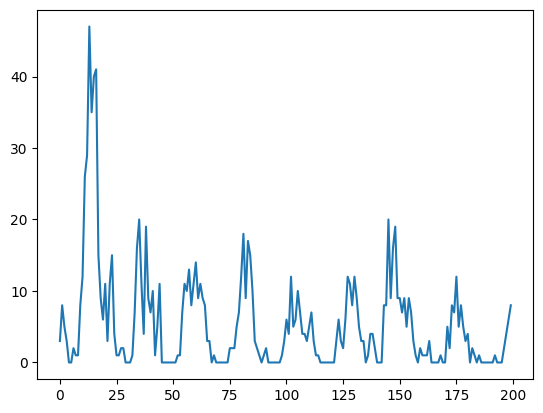

In [2]:
# Carga de los datos usando Pandas
dataset = pd.read_csv('bicycle_hour.csv')
display(dataset.head())

# Visualización de los datos
plt.plot(dataset['casual'][0:200])
plt.show()

In [3]:
# Removemos variables que no son determinantes para el modelo
dataset = dataset.drop(['instant', 'dteday', 'atemp'], axis = 1)
dataset.head()

# Codificación 1-hot de variables temporales
variables_categoricas = ['season', 'mnth', 'hr', 'weekday', 'weathersit']
for variable in variables_categoricas:
    dummies = pd.get_dummies(dataset[variable], prefix=variable, drop_first=False)
    dataset = pd.concat([dataset, dummies], axis=1)
dataset.head()

# Removemos variables temporales
dataset = dataset.drop(['season', 'mnth', 'hr', 'weekday', 'weathersit'], axis=1)
dataset.head()

# Estandarización de las características
caracteristicas_estandarizar = ['temp','hum','windspeed','casual','registered']
medias = []
desviaciones = []
for caracteristica in caracteristicas_estandarizar:
    mean = dataset[caracteristica].mean()
    std = dataset[caracteristica].std()
    dataset[caracteristica] = (dataset[caracteristica] - mean)/std
    medias.append(mean)
    desviaciones.append(std)
dataset.head()

# Separación de las características y las variables objetivo
caracteristicas = dataset.drop(['casual',	'registered',	'cnt'], axis = 1)
targets = dataset[['casual',	'registered']]

caracteristicas

# Construcción de los conjuntos de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(caracteristicas, targets, test_size=0.30)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

# Transformamos las series a arreglos de numpy
x_train = x_train.values
x_test = x_test.values
y_train = y_train.values
y_test = y_test.values

(13279, 57)
(13279, 2)
(5692, 57)
(5692, 2)


## Construcción del modelo

In [4]:
# Limpieza de modelos anteriores
# o sinó no sigue con más epocas
backend.clear_session()

In [5]:
# EJERCICIO
# Model construction
model = Sequential()
model.add(Dense(57, activation = 'relu', use_bias = True, input_shape = (57,)))
model.add(Dense(40, activation = 'sigmoid', use_bias = True))
model.add(Dense(2, activation = 'linear', use_bias = True))

# Model summary
model.summary()

Metal device set to: Apple M2 Max
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 57)                3306      
                                                                 
 dense_1 (Dense)             (None, 40)                2320      
                                                                 
 dense_2 (Dense)             (None, 2)                 82        
                                                                 
Total params: 5,708
Trainable params: 5,708
Non-trainable params: 0
_________________________________________________________________


2024-02-22 22:28:32.737416: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-02-22 22:28:32.737534: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [6]:
# Definición del optimizador
adam = optimizers.Adam(learning_rate = 0.0001)
# Compilación del modelo
model.compile(loss='mean_squared_error', optimizer=adam, metrics=['mse'])

# Entrenamiento del modelo
M = model.fit(x_train, y_train, batch_size=100,
               epochs=60, verbose=0, validation_data=(x_test, y_test), shuffle=True)

2024-02-22 22:28:32.850434: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2024-02-22 22:28:32.960040: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-02-22 22:28:33.655318: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


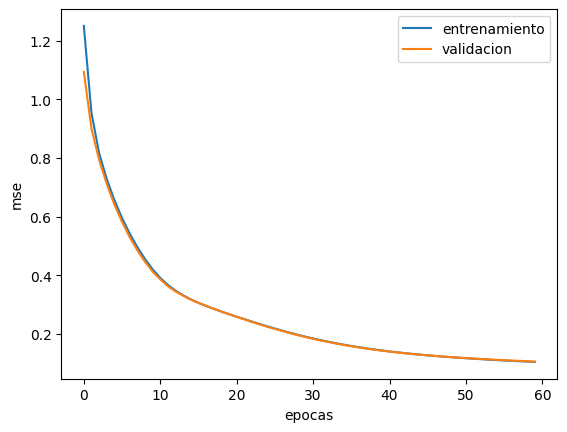

In [7]:
# Análisis de la grafícas de aprendizaje
plt.plot(M.history['mse'], label='entrenamiento')
plt.plot(M.history['val_mse'], label='validacion')
plt.xlabel('epocas')
plt.ylabel('mse')
plt.legend(loc='best')
plt.show()

# Inferencias

In [8]:
y_test[1000]

array([0.31201901, 2.41172864])

In [9]:
# EJERCICIO
# Has algunas predicciones con el modelo
muestra_de_prueba = x_test[2].reshape(1,-1)
prediccion = model.predict(muestra_de_prueba)
print(prediccion)

1/1 [==============================] - 0s 46ms/step
[[-0.4655468 -0.8195354]]


2024-02-22 22:29:09.083689: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [10]:
casual = (prediccion[0,0] * desviaciones[3]) + medias[3]
registered = (prediccion[0,1] * desviaciones[4]) + medias[4]

print('casual = ', casual)
print('registered = ', registered)


casual =  12.158492481674255
registered =  30.421046260819182


## r2 es una metrica mas estable

In [11]:
from sklearn.metrics import r2_score
r2_score_train = r2_score(y_train, model.predict(x_train))
r2_score_test = r2_score(y_test, model.predict(x_test))

print('r2_train', r2_score_train)
print('r2_test', r2_score_test)


178/178 [==============================] - 0s 1ms/step
r2_train 0.8958733356402754
r2_test 0.8966304349633858


7/7 [==============================] - 0s 3ms/step


2024-02-22 22:29:10.010136: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


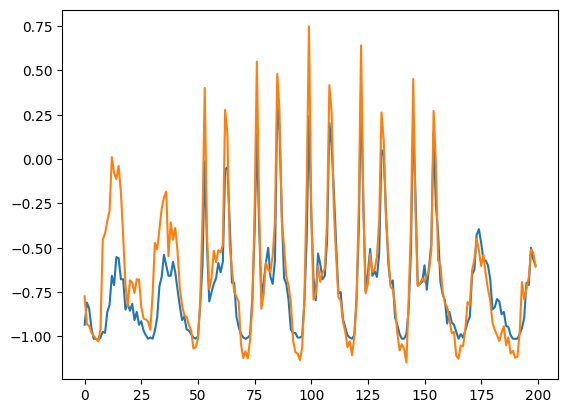

In [12]:
plt.plot(targets['registered'][0:200])
plt.plot(model.predict(caracteristicas[0:200])[:,1])